In [1]:
import qutip as qt

In the next few cells, we see that the density parameter of rand_herm is for the sparsness/

In [20]:
H_system_2 = qt.rand_herm(100,0.75)  # Random Hermitian matrix for system 2
H_system_1 = qt.rand_herm(100,1)  # Random Hermitian matrix for system 2


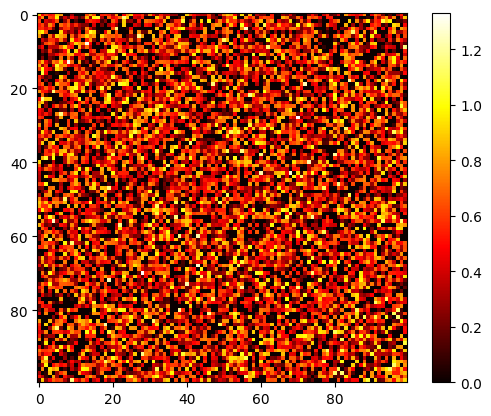

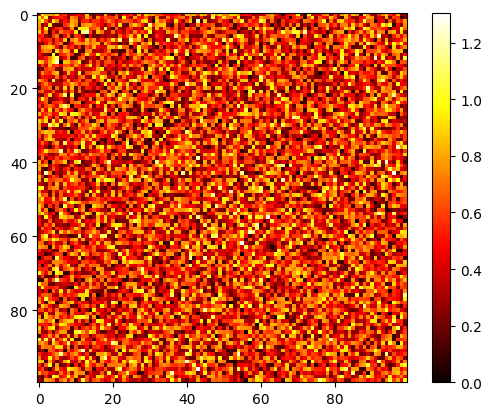

In [21]:

import matplotlib.pyplot as plt
a=H_system_2.full()
a = abs(a)
# Assuming H_system_2 is the matrix you want to visualize
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

a=H_system_1.full()
a = abs(a)
# Assuming H_system_2 is the matrix you want to visualize
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()
